# TASK 1

In [633]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

data = pd.read_csv('cardio-train.csv',delimiter=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150,20535.0,NaN,163.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,0
1,88880,16125.0,Men,168.0,68.0,110.0,70.0,NaN,NaN,0.0,0.0,NaN,0
2,10483,19761.0,NaN,170.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,1
3,22798,19035.0,Men,NaN,89.0,NaN,80.0,Normal,NaN,0.0,NaN,NaN,0
4,85542,NaN,NaN,158.0,74.0,NaN,93.0,High,NaN,0.0,1.0,1.0,1


1.

Nominal -> id, gender, smoke, alco, cardio

Ordinal -> cholesterol, gluc

Interval -> height, weight, ap_hi, ap_lo

Ratio -> age

2.

In [634]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
id             500 non-null int64
age            335 non-null float64
gender         329 non-null object
height         198 non-null float64
weight         336 non-null float64
ap_hi          347 non-null float64
ap_lo          332 non-null float64
cholesterol    333 non-null object
gluc           333 non-null object
smoke          326 non-null float64
alco           335 non-null float64
active         343 non-null float64
cardio         500 non-null int64
dtypes: float64(8), int64(2), object(3)
memory usage: 45.0+ KB
None


In [635]:
print(data.describe())

                 id           age      height      weight       ap_hi  \
count    500.000000    335.000000  198.000000  336.000000  347.000000   
mean   50279.916000  19490.886567  163.934343   74.347321  128.685879   
std    29913.623631   2466.702487    8.258559   14.335964   18.490176   
min       38.000000  14334.000000  120.000000   45.000000   12.000000   
25%    23446.500000  17988.500000  159.250000   65.000000  120.000000   
50%    51913.500000  19719.000000  165.000000   72.000000  120.000000   
75%    78656.000000  21597.500000  168.000000   82.000000  140.000000   
max    99662.000000  23479.000000  187.000000  155.000000  190.000000   

             ap_lo       smoke        alco      active      cardio  
count   332.000000  326.000000  335.000000  343.000000  500.000000  
mean     90.060241    0.092025    0.065672    0.813411    0.502000  
std      87.396945    0.289505    0.248078    0.390150    0.500497  
min      60.000000    0.000000    0.000000    0.000000    0.000000

3. 

In [636]:
data.isnull().sum(axis=0)

id               0
age            165
gender         171
height         302
weight         164
ap_hi          153
ap_lo          168
cholesterol    167
gluc           167
smoke          174
alco           165
active         157
cardio           0
dtype: int64

4.

4.a

In [637]:
#print(data)
data['age'] = data['age']//365
#print(data)
eldest = data['age'].max()
print("Age of oldest person is ", eldest)

Age of oldest person is  64.0


4.b

In [638]:
youngest = data['age'].min()
print("Age of youngest person is ", youngest)

Age of youngest person is  39.0


4.c

In [639]:
avg = data['age'].mean()
print("Average age group is {:.2f}".format(avg))

Average age group is 52.91


4.d

In [640]:
median =  data['age'].median()
print("Median of age is {:.2f}".format(median))

Median of age is 54.00


4.e

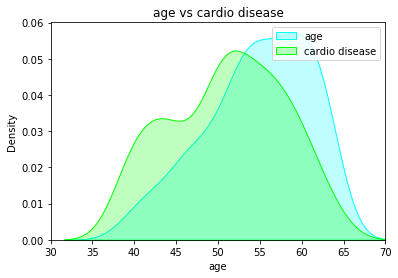

In [641]:
sns.kdeplot(data.age[data.cardio==1],color="cyan",shade=True)
sns.kdeplot(data.age[data.cardio==0],color="lime",shade=True)
plt.legend(['age','cardio disease'])
plt.title('age vs cardio disease')
plt.xlim(30,70)
plt.show()

4.f

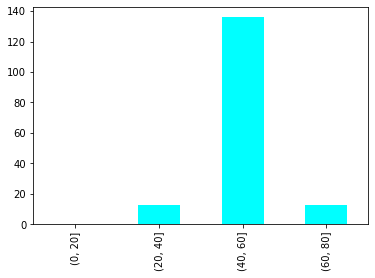

In [642]:
survive=[]
survive_df=pd.DataFrame(survive)
count=0

for i in data['cardio']:
    if i==0:
        survive_df = survive_df.append(data.iloc[count])   #copying row where cardio=0
    count+=1

survival_op = pd.cut(survive_df.age, bins= [0,20,40,60,80])
max_survival = survival_op.value_counts(sort=False)
max_surv_rate = max_survival.plot.bar(color="cyan")
plt.show()

In [643]:
total_op = pd.cut(data.age, bins= [0,20,40,60,80])
total_list = total_op.value_counts(sort=False)
print(type(total_list))

<class 'pandas.core.series.Series'>


In [644]:
zeroto20 = max_survival.iat[1]/total_list.iat[1]
twentyto40 = max_survival.iat[2]/total_list.iat[2]
fortyto60 = max_survival.iat[3]/total_list.iat[3]

print("Survival rate of 20-40 age group is {:.2f} ----> highest".format(zeroto20*100))
print("Survival rate of 40-60 age group is {:.2f}".format(twentyto40*100))
print("Survival rate of 60-80 age group is {:.2f}".format(fortyto60*100))

Survival rate of 20-40 age group is 81.25 ----> highest
Survival rate of 40-60 age group is 50.18
Survival rate of 60-80 age group is 27.08


4.g

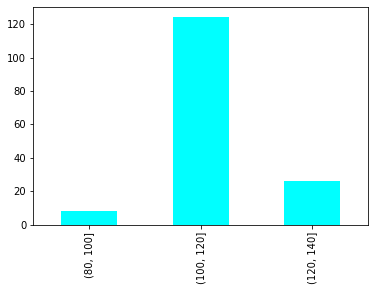

Survival rate of 20-40 age group is 50.00
Survival rate of 40-60 age group is 45.76
Survival rate of 60-80 age group is 54.17 ----> highest


In [645]:
survival_op = pd.cut(survive_df.ap_hi, bins= [80,100,120,140])
max_survival = survival_op.value_counts(sort=False)
max_surv_rate = max_survival.plot.bar(color="cyan")
plt.show()

zeroto20 = max_survival.iat[0]/total_list.iat[1]
twentyto40 = max_survival.iat[1]/total_list.iat[2]
fortyto60 = max_survival.iat[2]/total_list.iat[3]

print("Survival rate of 20-40 age group is {:.2f}".format(zeroto20*100))
print("Survival rate of 40-60 age group is {:.2f}".format(twentyto40*100))
print("Survival rate of 60-80 age group is {:.2f} ----> highest".format(fortyto60*100))

4.h

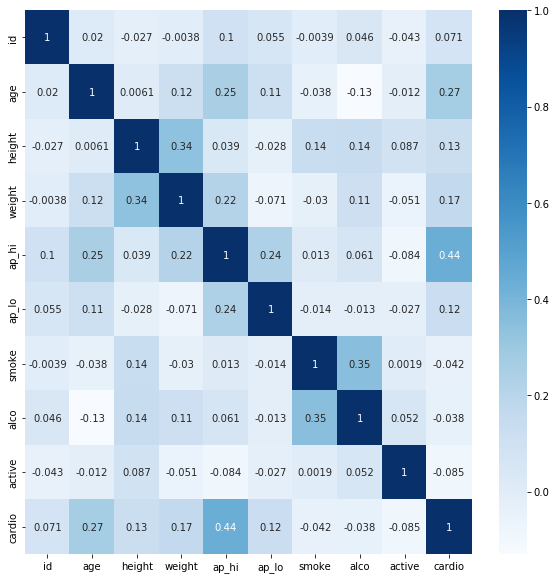

In [646]:
#data.iloc[:,2] = data.iloc[:,2].map({'Men':0, 'Women':1})
#data.iloc[:,7] = data.iloc[:,7].map({'Normal':0, 'Above Normal':1, 'High':2})
#data.iloc[:,8] = data.iloc[:,8].map({'Normal':0, 'Above Normal':1, 'High':2})

correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cmap="Blues",annot=True)

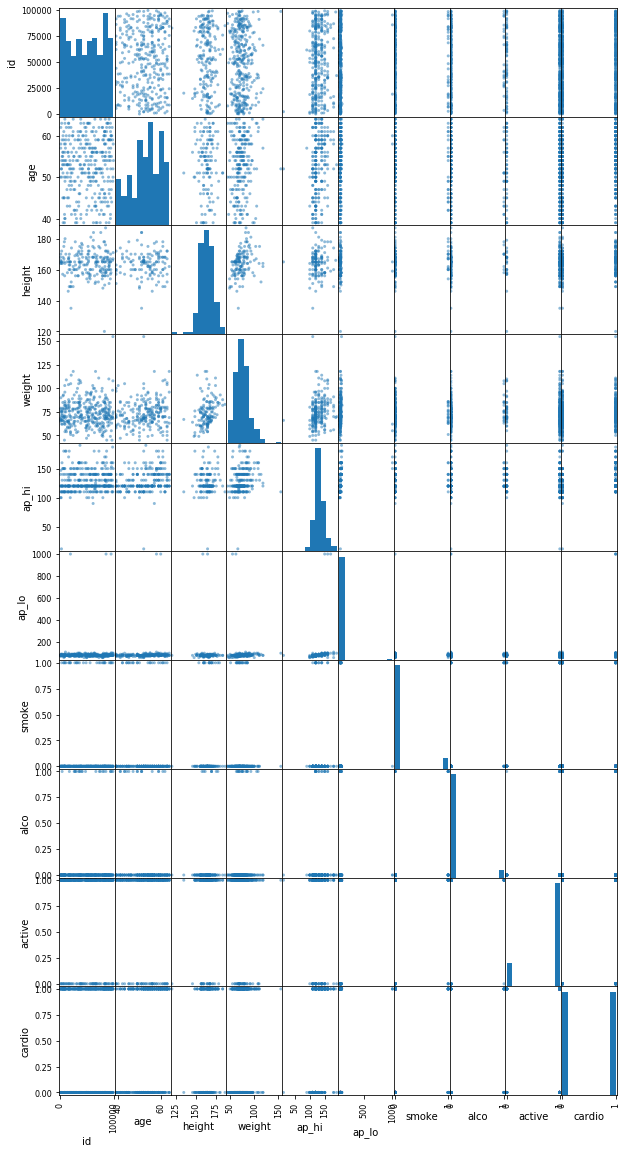

In [647]:
pd.plotting.scatter_matrix(data,figsize=(10,20))
plt.show()

<Figure size 720x720 with 0 Axes>

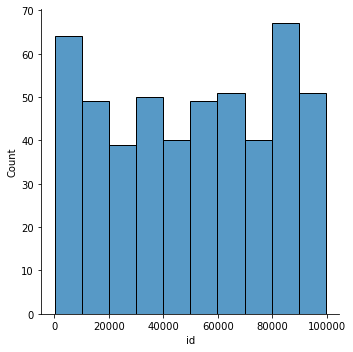

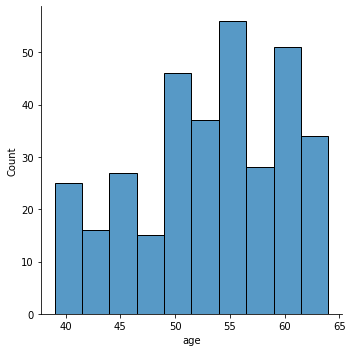

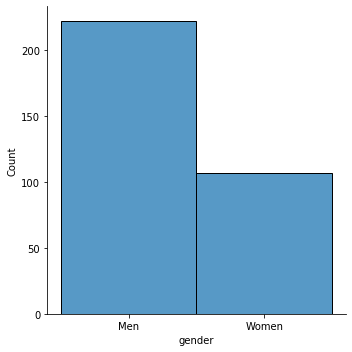

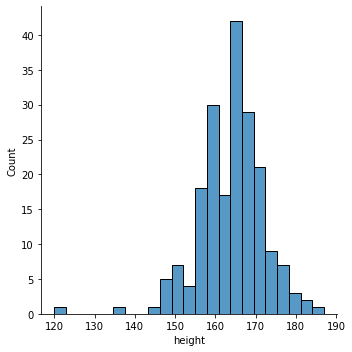

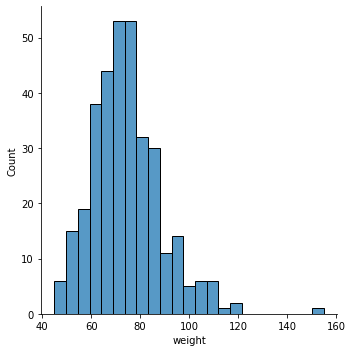

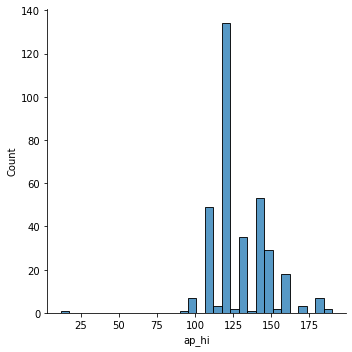

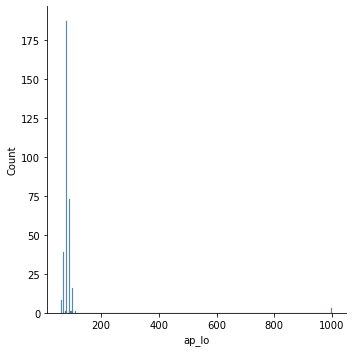

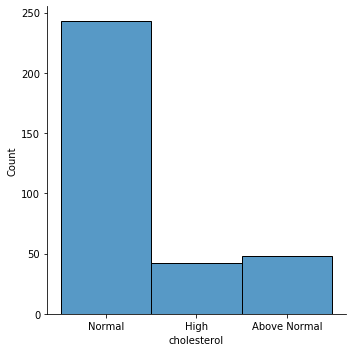

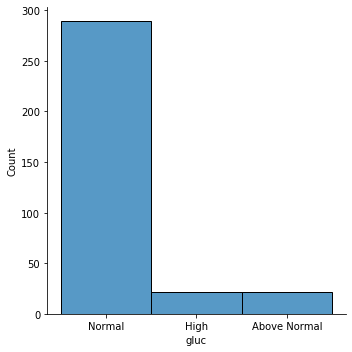

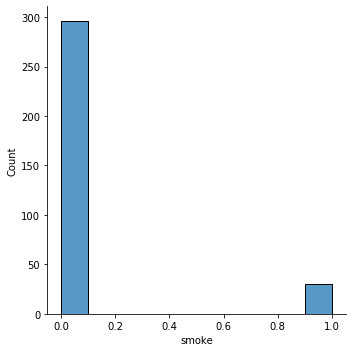

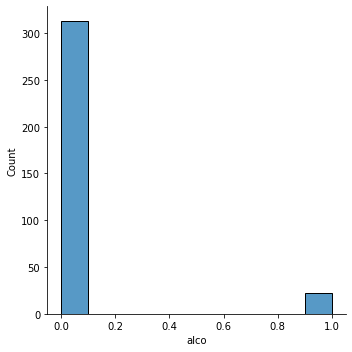

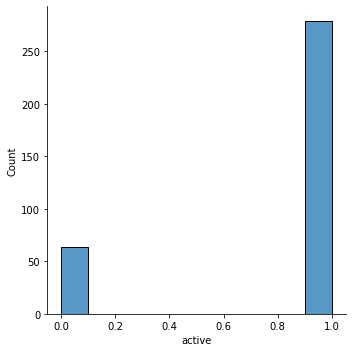

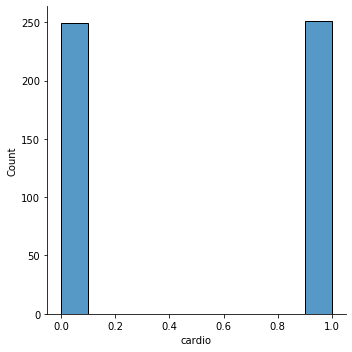

In [648]:
plt.figure(figsize=(10,10))
for column in data:
    sns.displot(data,x=column)

From the above plots we find that ap_hi,age and weight are the most influencing factors which decide whether the person is suffering from a cardio disease or not

4.i

In [649]:
data.isnull().sum()

id               0
age            165
gender         171
height         302
weight         164
ap_hi          153
ap_lo          168
cholesterol    167
gluc           167
smoke          174
alco           165
active         157
cardio           0
dtype: int64

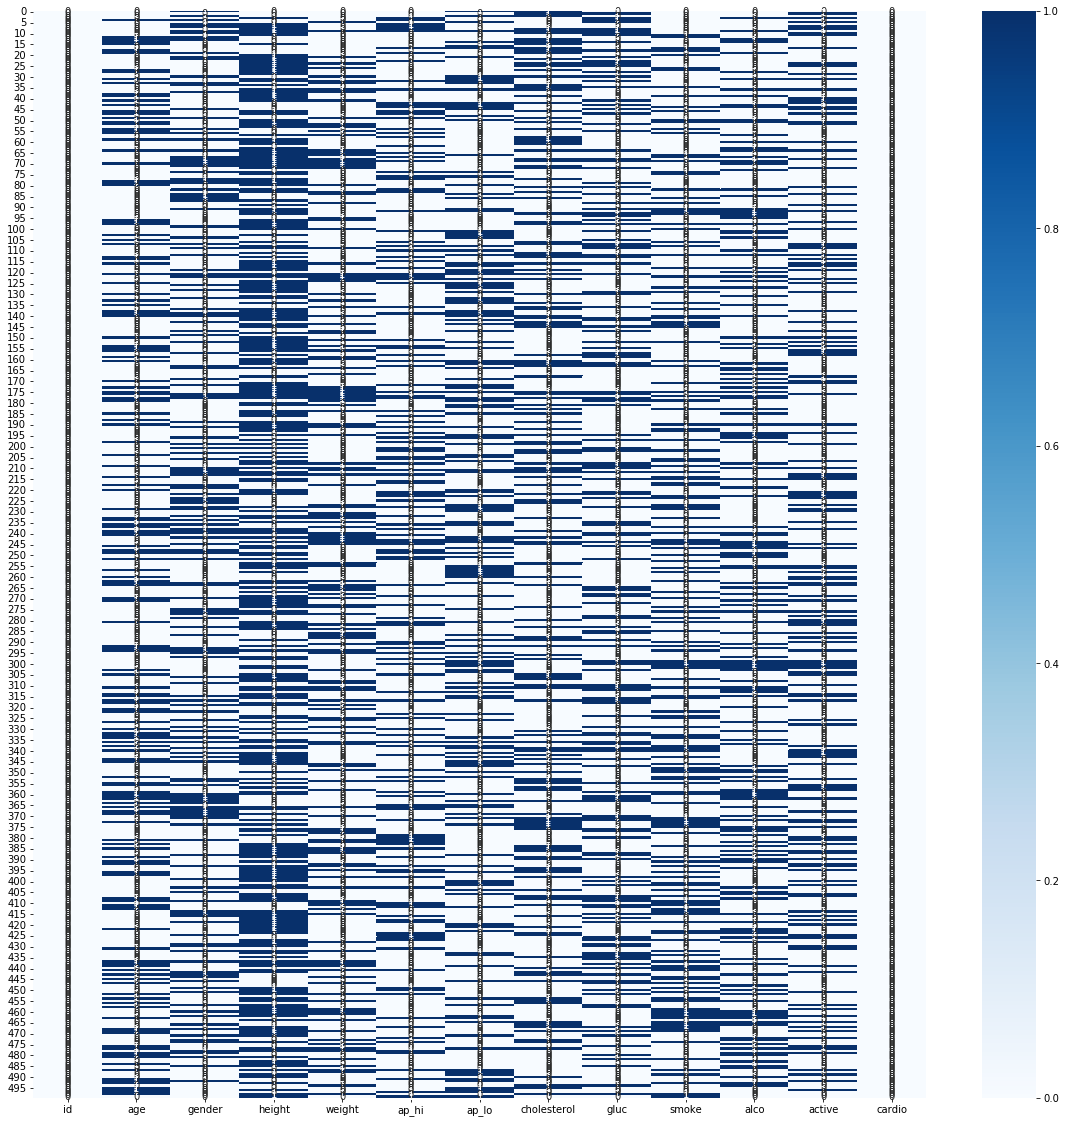

In [650]:
plt.figure(figsize=(20,20))
sns.heatmap(data.isnull(), cmap="Blues",annot=True)

4.j

In [651]:
data_dropna = data.dropna(axis=0)
print(data_dropna.shape)

(7, 13)


In [652]:
data_replace_0 = data.fillna(0)
#print(data_replace0)
#print(data_replace_0)

In [653]:
meaned = data_replace_0.mean()
#print(meaned)
data_replace_mean = data.fillna(meaned)
#print(data_replace_mean)

In [654]:
data_replace_pad = data.fillna(method="pad")   #drawback is if first record has NaN value it wont be replaced, 
# positive point is it can be used to fill NaN values in a column having non-integer values 
#print(data_replace_pad)

In [655]:
data_replace_bfill = data.fillna(method="bfill")
#print(data_replace_bfill)

4.l

In [656]:
processed_data = data_replace_mean.fillna(method="pad").fillna(method="bfill")
print(processed_data)

# checking if all NaN values are replaced 
print(processed_data.isnull().sum(axis=0))

        id    age gender   height    weight    ap_hi  ap_lo   cholesterol  \
0    92150  56.00    Men  163.000   75.0000  120.000   59.8        Normal   
1    88880  44.00    Men  168.000   68.0000  110.000   70.0        Normal   
2    10483  54.00    Men  170.000   75.0000  120.000   59.8        Normal   
3    22798  52.00    Men   64.918   89.0000   89.308   80.0        Normal   
4    85542  35.45    Men  158.000   74.0000   89.308   93.0          High   
5    81772  45.00  Women  178.000   49.9614  160.000   59.8        Normal   
6     7824  50.00  Women   64.918   45.0000   89.308   70.0        Normal   
7    75053  52.00  Women   64.918   69.0000   89.308   80.0        Normal   
8    48292  58.00  Women   64.918   93.0000   89.308   80.0        Normal   
9    66074  51.00  Women   64.918   49.9614   89.308   59.8        Normal   
10   72532  52.00  Women   64.918   56.0000  180.000   60.0        Normal   
11   64953  64.00    Men   64.918   69.0000  140.000  100.0        Normal   

In [657]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

validation_data = pd.read_csv("cardio-validation.csv")
#validation_data = validation_data.iloc[1:,:] 
#print(validation_data)
val_cardio = validation_data['cardio']
validation_data['age'] = validation_data['age']//365

validation_data.isnull().sum()

mean_val = validation_data.fillna(0).mean()
processed_validation_data = validation_data.fillna(mean_val).fillna(method="bfill").fillna(method="pad")

processed_validation_data.isnull().sum()
#print(processed_validation_data)

frames = [processed_data, processed_validation_data]
#print(processed_data.shape)
#print(processed_validation_data.shape)
train_validation = pd.concat(frames)
print(train_validation.shape)

#x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2)

train_validation.iloc[:,2] = train_validation.iloc[:,2].map({'Men':0, 'Women':1})
train_validation.iloc[:,7] = train_validation.iloc[:,7].map({'Normal':0, 'Above Normal':1, 'High':2})
train_validation.iloc[:,8] = train_validation.iloc[:,8].map({'Normal':0, 'Above Normal':1, 'High':2})

print(train_validation)

all_features = ['age','gender','ap_hi','ap_lo','cholesterol','gluc','smoke','active','height','weight','alco']
X = train_validation[all_features]
Y = train_validation['cardio']

LRModel = LogisticRegression(max_iter=2000, multi_class='auto',solver='lbfgs')
#LRModel.fit(x_train,y_train)
LRModel.fit(X,Y)

(1000, 13)
        id     age  gender   height    weight    ap_hi   ap_lo  cholesterol  \
0    92150  56.000       0  163.000   75.0000  120.000   59.80            0   
1    88880  44.000       0  168.000   68.0000  110.000   70.00            0   
2    10483  54.000       0  170.000   75.0000  120.000   59.80            0   
3    22798  52.000       0   64.918   89.0000   89.308   80.00            0   
4    85542  35.450       0  158.000   74.0000   89.308   93.00            2   
5    81772  45.000       1  178.000   49.9614  160.000   59.80            0   
6     7824  50.000       1   64.918   45.0000   89.308   70.00            0   
7    75053  52.000       1   64.918   69.0000   89.308   80.00            0   
8    48292  58.000       1   64.918   93.0000   89.308   80.00            0   
9    66074  51.000       1   64.918   49.9614   89.308   59.80            0   
10   72532  52.000       1   64.918   56.0000  180.000   60.00            0   
11   64953  64.000       0   64.918   69.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [658]:
X_ctrain = processed_data[all_features]
print(X_ctrain)
X_ctrain.iloc[:,1] = X_ctrain.iloc[:,1].map({'Men':0, 'Women':1})
X_ctrain.iloc[:,4] = X_ctrain.iloc[:,4].map({'Normal':0, 'Above Normal':1, 'High':2})
X_ctrain.iloc[:,5] = X_ctrain.iloc[:,5].map({'Normal':0, 'Above Normal':1, 'High':2})

Y_ctrain = processed_data['cardio']

       age gender    ap_hi  ap_lo   cholesterol          gluc  smoke  active  \
0    56.00    Men  120.000   59.8        Normal        Normal   0.00   1.000   
1    44.00    Men  110.000   70.0        Normal        Normal   0.00   0.558   
2    54.00    Men  120.000   59.8        Normal        Normal   0.00   1.000   
3    52.00    Men   89.308   80.0        Normal        Normal   0.00   0.558   
4    35.45    Men   89.308   93.0          High        Normal   0.00   1.000   
5    45.00  Women  160.000   59.8        Normal        Normal   1.00   0.558   
6    50.00  Women   89.308   70.0        Normal        Normal   0.00   1.000   
7    52.00  Women   89.308   80.0        Normal        Normal   0.00   0.558   
8    58.00  Women   89.308   80.0        Normal        Normal   0.00   0.558   
9    51.00  Women   89.308   59.8        Normal        Normal   0.00   0.000   
10   52.00  Women  180.000   60.0        Normal        Normal   0.00   0.558   
11   64.00    Men  140.000  100.0       

In [659]:
test= pd.read_csv("cardio-test.csv")
print(test.isnull().sum())

test['age']=test['age']//365

test.iloc[:,2] = test.iloc[:,2].map({'Men':0, 'Women':1})
test.iloc[:,7] = test.iloc[:,7].map({'Normal':0, 'Above Normal':1, 'High':2})
test.iloc[:,8] = test.iloc[:,8].map({'Normal':0, 'Above Normal':1, 'High':2})

test_X = test[all_features]

LRPrediction = LRModel.predict(test_X)
#print(LRPrediction)


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
dtype: int64


In [660]:
prediction = pd.DataFrame()
prediction['id'] = test['id']
prediction['cardio'] = LRPrediction
prediction.to_csv('prediction-cardio-test-LR.csv', index=False, encoding='utf-8')

In [661]:
# Feature Selection on LR model

features = ['ap_hi', 'cholesterol', 'age', 'height']
X = train_validation[features]
Y = train_validation['cardio']
#x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2)

LRModel2 = LogisticRegression(max_iter=200,solver='lbfgs')
#LRModel.fit(x_train,y_train)
LRModel2.fit(X,Y)

test_X = test[features]
LRPrediction = LRModel2.predict(test_X)

prediction = pd.DataFrame()
prediction['id'] = test['id']
prediction['cardio'] = LRPrediction
prediction.to_csv('prediction-cardio-test-LR-featselect.csv', index=False, encoding='utf-8')

In [662]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

X = train_validation[all_features]
print(X.shape)
Y = train_validation['cardio']
RF_model = RandomForestClassifier(criterion="entropy", n_estimators=20)
RF_model.fit(X,Y)

test_X = test[all_features]
RFprediction = RF_model.predict(test_X)

prediction = pd.DataFrame()
prediction['id'] = test['id']
prediction['cardio'] = RFprediction
prediction.to_csv('prediction-cardio-test-RF.csv', index=False, encoding='utf-8')

(1000, 11)


In [663]:
# random forest search CV

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

print(X.shape)
print(Y.shape)
print(test_X.shape)

forest=RandomForestClassifier()
param_grid_rf = [{'n_estimators': [50,70,100,150,200], 'max_features': [5, 10],'max_depth': [3,5,7,10], 'bootstrap': [True, False]}]

clf_rf = GridSearchCV(forest, param_grid_rf,cv=5,verbose=0,n_jobs=-1)
rf_cv = clf_rf.fit(X,Y)

rf_cv_pred = rf_cv.predict(test_X)

prediction = pd.DataFrame()
prediction['id'] = test['id']
prediction['cardio'] = rf_cv_pred
prediction.to_csv('prediction-cardio-test-RF-gridCV.csv', index=False, encoding='utf-8')


x_train,x_test,y_train,y_test = train_test_split(X_ctrain,Y_ctrain,test_size=0.2)
rf_cv = clf_rf.fit(x_train,y_train)
y_pred = rf_cv.predict(x_test)

(1000, 11)
(1000,)
(250, 11)


4.m

In [664]:
# manual implementation of logistic regression

class LR:
    def __init__(self, lr=0.001, iterations=1000):
        self.lr=lr
        self.iterations=iterations
        self.weights= None
        self.bias = None
        
    def fit(self,X,y):  
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias=0
        
        for _ in range (self.iterations):
            linear_model=np.dot(X, self.weights) + self.bias # mx+b
            y_pred=self.sigmoid_function(linear_model)
            
            dw = (1/m)*np.dot(X.T, (y_pred-y))   
            db = (1/m)*np.sum(y_pred - y)
            
            self.weights -= self.lr*dw
            self.bias -= self.lr*db
            
    def predict(self,X):
        linear_model = np.dot(X, self.weights) + self.bias   # mx+b
        y_pred = self.sigmoid_function(linear_model)
        y_pred_class = [1 if i>0.5 else 0 for i in y_pred]
        return y_pred_class
    
    def sigmoid_function(self,x): 
        return 1 / (1 + np.exp(-x))
    
    
X = train_validation[all_features]
Y = train_validation['cardio']
print(X.shape)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=50)

reg_lr= LR( lr= 0.0001, iterations=1000) 
reg_lr.fit(x_train, y_train)

pred = reg_lr.predict(x_test)

print("Accuracy score :", np.sum(y_test==pred) / len(y_test))

(1000, 11)
Accuracy score : 0.635


4.n

In [665]:
"""prediction = pd.DataFrame()
prediction['id'] = test['id']
prediction['cardio'] = RFprediction
prediction.to_csv('prediction-cardio-test.csv', index=False, encoding='utf-8')"""

"prediction = pd.DataFrame()\nprediction['id'] = test['id']\nprediction['cardio'] = RFprediction\nprediction.to_csv('prediction-cardio-test.csv', index=False, encoding='utf-8')"

4.o

the first 8 submission on kaggle were using only cardio-train.csv, then i replaced the data in model with cardio-train+cardio-validation


# TASK 2

In [666]:
completed_data = pd.read_csv("cardio-complete.csv")
#print(complete_data.isnull().sum()) # there are no null values 

completed_data.iloc[1:,2] = completed_data.iloc[1:,2].map({'Men':0, 'Women':1})
completed_data.iloc[1:,7] = completed_data.iloc[1:,7].map({'Normal':0, 'Above Normal':1, 'High':2})
completed_data.iloc[1:,8] = completed_data.iloc[1:,8].map({'Normal':0, 'Above Normal':1, 'High':2})

#print(completed_data)
X = completed_data.iloc[1:,:12]
Y = completed_data.iloc[1:,-1]

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

LRModel2.fit(x_train,y_train)

complete_prediction = LRModel2.predict(x_test)

print("For Task 2 ")
print('Model Accuracy : ',accuracy_score(y_test, complete_prediction))

cm = confusion_matrix(y_test, complete_prediction)
print("Confusion Matrix = ",cm)

precision = precision_score(y_test, complete_prediction,pos_label=1,labels=[0,1])
print("Precision: {:.2f}".format(precision))

recall = recall_score(y_test, complete_prediction,pos_label=1,labels=[0,1])
print("Recall: {:.2f}".format(recall))

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, complete_prediction,pos_label=1,labels=[0,1])
print("F1 Score is {:.2f}".format(f1))


For Task 2 
Model Accuracy :  0.695
Confusion Matrix =  [[84 21]
 [40 55]]
Precision: 0.72
Recall: 0.58
F1 Score is 0.64


# TASK 3

(799, 4)
(799, 70)
(200, 70)
Train Accuracy :  72.3404255319149 %
Min Score is 0.575
Mean Score is 0.7047428080050031
Max Score is 0.8 


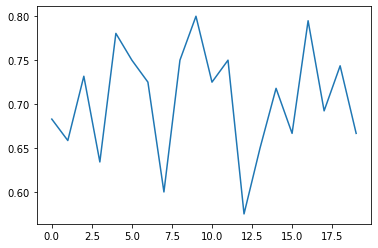

In [667]:
from sklearn.preprocessing import PolynomialFeatures

x_train = x_train[features]
print(x_train.shape)
poly = PolynomialFeatures(4)

x_transform_train = poly.fit_transform(x_train)
x_train_trans_df = pd.DataFrame(x_transform_train)
print(x_train_trans_df.shape)

x_test = x_test[features]
x_transform_test = poly.fit_transform(x_test)
x_test_trans_df = pd.DataFrame(x_transform_test)
print(x_test_trans_df.shape)

LRModel2.fit(x_train_trans_df,y_train)
complete_prediction = LRModel2.predict(x_test_trans_df)
print('Train Accuracy : ',LRModel2.score(x_train_trans_df,y_train)*100,"%")

# if we choose all features ------->> for polynomial degree = 1 we are getting highest accuracy(71.5%), as we increase the degree >1 the accuracy goes on decreasing
# for degree=2 it was 70% for  degree=3 it was 67.5%

# if we choose selected features ------>> degree=4 gives maximum accuracy of 71%

from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(LRModel2, x_train, y_train, cv=20)
print("Min Score is {}\nMean Score is {}\nMax Score is {} ".format(cross_score.min(), cross_score.mean(), cross_score.max()))
plt.plot(cross_score)

# both training accuracy and cross validation score are higher so the model is not overfitting and is good to be used.